In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "telecom-churn"

## 1. Using R Studio (or any R compiler), install the following packages as follows: 

In [2]:
# Install required packages
pkgs <- sort(c('tidyverse', 'GGally', 'ggcorrplot', 'plotly', 'factoextra', 
               'arules', 'seriation', 'sampling', 'caret', 'proxy'))
pkgs_install <- pkgs[!(pkgs %in% installed.packages()[, "Package"])]
if(length(pkgs_install)) install.packages(pkgs_install)

# Load the libraries
lapply(pkgs, library, character.only = TRUE)


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config



A

[[1]]
 [1] "arules"    "Matrix"    "lubridate" "forcats"   "stringr"   "dplyr"    
 [7] "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse"
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "bigrquery"
[19] "httr"      "methods"   "base"     

[[2]]
 [1] "caret"     "lattice"   "arules"    "Matrix"    "lubridate" "forcats"  
 [7] "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"     "tibble"   
[13] "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices" "utils"    
[19] "datasets"  "bigrquery" "httr"      "methods"   "base"     

[[3]]
 [1] "factoextra" "caret"      "lattice"    "arules"     "Matrix"    
 [6] "lubridate"  "forcats"    "stringr"    "dplyr"      "purrr"     
[11] "readr"      "tidyr"      "tibble"     "ggplot2"    "tidyverse" 
[16] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[21] "bigrquery"  "httr"       "methods"    "base"      

[[4]]
 [1] "GGally"     "factoextra" "caret"      "lattice"    "arules"    
 [6] "Matrix"     "lubridate"  "forcats"    "stringr"    "dplyr"     
[11] "purrr"      "readr"      "tidyr"      "tibble"     "ggplot2"   
[16] "tidyverse"  "stats"      "graphics"   "grDevices"  "utils"     
[21] "datasets"   "bigrquery"  "httr"       "methods"    "base"      

[[5]]
 [1] "ggcorrplot" "GGally"     "factoextra" "caret"      "lattice"   
 [6] "arules"     "Matrix"     "lubridate"  "forcats"    "stringr"   
[11] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[16] "ggplot2"    "tidyverse"  "stats"      "graphics"   "grDevices" 
[21] "utils"      "datasets"   "bigrquery"  "httr"       "methods"   
[26] "base"      

[[6]]
 [1] "plotly"     "ggcorrplot" "GGally"     "factoextra" "caret"     
 [6] "lattice"    "arules"     "Matrix"     "lubridate"  "forcats"   
[11] "stringr"    "dplyr"      "purrr"      "readr"      "tidyr"     
[16] "tibble"     "ggplot2"    "tidyverse"  "stats"      "graphics"  
[21] "grDevices"  "utils"      "datasets"   "bigrquery"  "httr"      
[26] "methods"    "base"      

[[7]]
 [1] "proxy"      "plotly"     "ggcorrplot" "GGally"     "factoextra"
 [6] "caret"      "lattice"    "arules"     "Matrix"     "lubridate" 
[11] "forcats"    "stringr"    "dplyr"      "purrr"      "readr"     
[16] "tidyr"      "tibble"     "ggplot2"    "tidyverse"  "stats"     
[21] "graphics"   "grDevices"  "utils"      "datasets"   "bigrquery" 
[26] "httr"       "methods"    "base"      

[[8]]
 [1] "sampling"   "proxy"      "plotly"     "ggcorrplot" "GGally"    
 [6] "factoextra" "caret"      "lattice"    "arules"     "Matrix"    
[11] "lubridate"  "forcats"    "stringr"    "dplyr"      "purrr"     
[16] "readr"      "tidyr"      "tibble"     "ggplot2"    "tidyverse" 
[21] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[26] "bigrquery"  "httr"       "methods"    "base"      

[[9]]
 [1] "seriation"  "sampling"   "proxy"      "plotly"     "ggcorrplot"
 [6] "GGally"     "factoextra" "caret"      "lattice"    "arules"    
[11] "Matrix"     "lubridate"  "forcats"    "stringr"    "dplyr"     
[16] "purrr"      "readr"      "tidyr"      "tibble"     "ggplot2"   
[21] "tidyverse"  "stats"      "graphics"   "grDevices"  "utils"     
[26] "datasets"   "bigrquery"  "httr"       "methods"    "base"      

[[10]]
 [1] "seriation"  "sampling"   "proxy"      "plotly"     "ggcorrplot"
 [6] "GGally"     "factoextra" "caret"      "lattice"    "arules"    
[11] "Matrix"     "lubridate"  "forcats"    "stringr"    "dplyr"     
[16] "purrr"      "readr"      "tidyr"      "tibble"     "ggplot2"   
[21] "tidyverse"  "stats"      "graphics"   "grDevices"  "utils"     
[26] "datasets"   "bigrquery"  "httr"       "methods"    "base"

## 2. Give a brief description of each package of ten packages above. 


### 1. `tidyverse`
- **Description**: The `tidyverse` is a collection of R packages designed for data science. It includes packages such as `ggplot2`, `dplyr`, `tidyr`, and others that are used for data manipulation, visualization, and analysis in a consistent and efficient way. It provides a unified interface to common data manipulation tasks.

### 2. `GGally`
- **Description**: `GGally` is an extension of `ggplot2` that provides functions to visualize data and relationships between variables in a dataset. It includes several types of plots, such as pairs plots, that are useful for exploratory data analysis (EDA) and understanding correlations among variables.

### 3. `ggcorrplot`
- **Description**: `ggcorrplot` is a package for visualizing correlation matrices. It creates heatmaps of correlations with customizable color schemes, helping users to easily interpret relationships between numeric variables in their dataset. It is built on top of `ggplot2` for creating static visualizations.

### 4. `plotly`
- **Description**: `plotly` is an interactive graphing library that allows users to create dynamic, web-based visualizations. It supports a wide variety of plots such as scatter plots, bar charts, line charts, and 3D visualizations. The interactive nature of the plots allows users to zoom, pan, and hover for more information.

### 5. `factoextra`
- **Description**: `factoextra` is a package designed to help visualize the results of multivariate data analysis. It is especially useful for visualizing clustering, principal component analysis (PCA), and other dimensionality reduction techniques. The package offers easy-to-use functions to visualize the quality of clusters and the significance of variables.

### 6. `arules`
- **Description**: `arules` is a package for mining association rules and frequent itemsets. It is commonly used in market basket analysis to uncover relationships between different items in large datasets. The package provides functions for rule generation, visualization, and evaluation of association rules.

### 7. `seriation`
- **Description**: `seriation` is used for the visual exploration and clustering of complex datasets. It provides tools for ordering rows and columns of data to uncover structure in datasets, such as visualizing hierarchical relationships in data matrices or similarity networks.

### 8. `sampling`
- **Description**: `sampling` is a package designed to perform different types of statistical sampling. It provides functions for random sampling, stratified sampling, and other sampling techniques. The package is often used in survey sampling and statistical analysis.

### 9. `caret`
- **Description**: `caret` stands for "Classification And REgression Training." It is an extensive package used for building machine learning models. It provides functions for pre-processing data, selecting models, training and evaluating models, and performing cross-validation, making it a go-to tool for machine learning practitioners in R.

### 10. `proxy`
- **Description**: `proxy` is a package for calculating dissimilarity and distance measures between objects, which is essential in clustering and classification tasks. It includes functions for various distance metrics such as Euclidean, Manhattan, and cosine similarity, and is widely used in data mining and machine learning algorithms.


## 3. Load Customer Churn dataset as follows: 


In [42]:
ibrary(tidyverse) 
churn (customer_churn.csv) 
churn <- as_tibble(churn) 
churn 

Rows: 3333 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustSer...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 3,333 × 13
   Churn AccountWeeks ContractRenewal DataPlan DataUsage CustServCalls DayMins
   <dbl>        <dbl>           <dbl>    <dbl>     <dbl>         <dbl>   <dbl>
 1     0          128               1        1      2.7              1    265.
 2     0          107               1        1      3.7              1    162.
 3     0          137               1        0      0                0    243.
 4     0           84               0        0      0                2    299.
 5     0           75               0        0      0                3    167.
 6     0          118               0        0      0                0    223.
 7     0          121               1        1      2.03             3    218.
 8     0          147               0        0      0                0    157 
 9     0          117               1        0      0.19             1    184.
10     0          141               0        1      3.02             0    259.
# ℹ 3,323 more rows
# ℹ 6 mor

## 5. Show the output of the below code and elaborate on the output. 


In [43]:
print(churn, n = 3, width = Inf)
summary(churn)


# A tibble: 3,333 × 13
  Churn AccountWeeks ContractRenewal DataPlan DataUsage CustServCalls DayMins
  <dbl>        <dbl>           <dbl>    <dbl>     <dbl>         <dbl>   <dbl>
1     0          128               1        1       2.7             1    265.
2     0          107               1        1       3.7             1    162.
3     0          137               1        0       0               0    243.
  DayCalls MonthlyCharge OverageFee RoamMins tenure TotalCharges
     <dbl>         <dbl>      <dbl>    <dbl>  <int>        <dbl>
1      110            89       9.87     10       49         4361
2      123            82       9.78     13.7     65         5330
3      114            52       6.06     12.2     25         1300
# ℹ 3,330 more rows


     Churn         AccountWeeks   ContractRenewal     DataPlan     
 Min.   :0.0000   Min.   :  1.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.: 74.0   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :0.0000   Median :101.0   Median :1.0000   Median :0.0000  
 Mean   :0.1449   Mean   :101.1   Mean   :0.9031   Mean   :0.2766  
 3rd Qu.:0.0000   3rd Qu.:127.0   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :243.0   Max.   :1.0000   Max.   :1.0000  
   DataUsage      CustServCalls      DayMins         DayCalls    
 Min.   :0.0000   Min.   :0.000   Min.   :  0.0   Min.   :  0.0  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:143.7   1st Qu.: 87.0  
 Median :0.0000   Median :1.000   Median :179.4   Median :101.0  
 Mean   :0.8165   Mean   :1.563   Mean   :179.8   Mean   :100.4  
 3rd Qu.:1.7800   3rd Qu.:2.000   3rd Qu.:216.4   3rd Qu.:114.0  
 Max.   :5.4000   Max.   :9.000   Max.   :350.8   Max.   :165.0  
 MonthlyCharge      OverageFee       RoamMins         tenure  

## 6. Write code to compute Mean of Numeric Variables from the dataset 


In [44]:
churn %>% 
  select_if(is.numeric) %>%
  summarise_all(mean, na.rm = TRUE)


Churn     AccountWeeks ContractRenewal DataPlan  DataUsage CustServCalls
1 0.1449145 101.0648     0.9030903       0.2766277 0.8164746 1.562856     
  DayMins  DayCalls MonthlyCharge OverageFee RoamMins tenure   TotalCharges
1 179.7751 100.4356 56.30516      10.05149   10.23729 36.36484 2042.746

## 7. Pairwise Plot for Feature Relationships 


Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation i

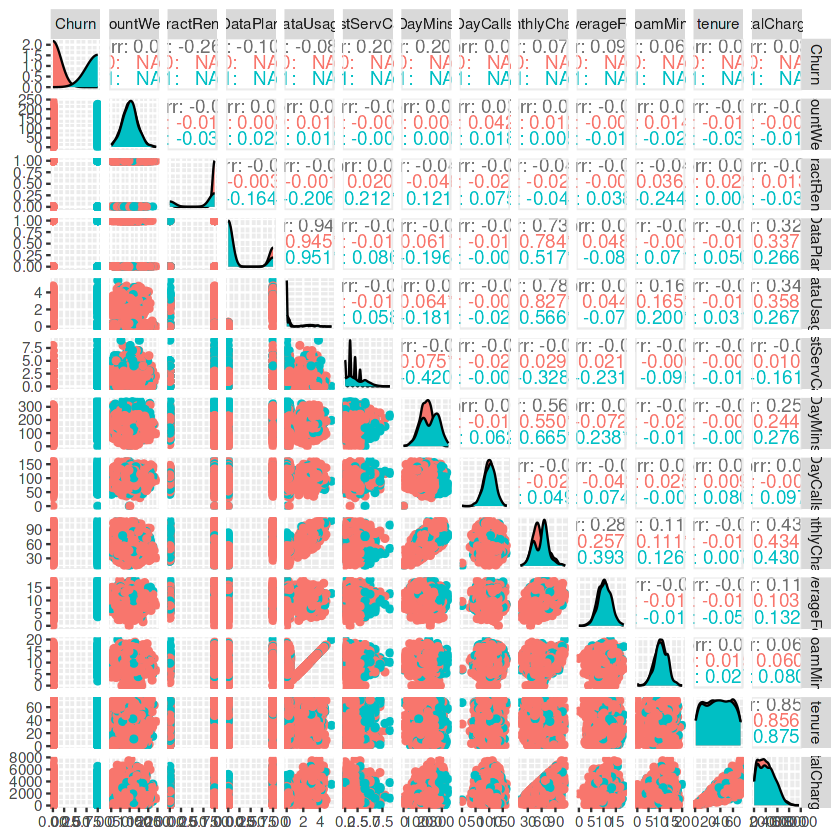

In [46]:
library(GGally)

# Suppress warnings while creating the pair plot
suppressWarnings(
  ggpairs(churn, aes(color = as.factor(Churn)), progress = FALSE)
)


## 8. Show the output of the below code and elaborate on the output 


In [7]:
clean.data <- churn %>%
  drop_na() %>%
  unique()
summary(clean.data)


     Churn         AccountWeeks   ContractRenewal     DataPlan     
 Min.   :0.0000   Min.   :  1.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.: 74.0   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :0.0000   Median :101.0   Median :1.0000   Median :0.0000  
 Mean   :0.1449   Mean   :101.1   Mean   :0.9031   Mean   :0.2766  
 3rd Qu.:0.0000   3rd Qu.:127.0   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :243.0   Max.   :1.0000   Max.   :1.0000  
   DataUsage      CustServCalls      DayMins         DayCalls    
 Min.   :0.0000   Min.   :0.000   Min.   :  0.0   Min.   :  0.0  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:143.7   1st Qu.: 87.0  
 Median :0.0000   Median :1.000   Median :179.4   Median :101.0  
 Mean   :0.8165   Mean   :1.563   Mean   :179.8   Mean   :100.4  
 3rd Qu.:1.7800   3rd Qu.:2.000   3rd Qu.:216.4   3rd Qu.:114.0  
 Max.   :5.4000   Max.   :9.000   Max.   :350.8   Max.   :165.0  
 MonthlyCharge      OverageFee       RoamMins    
 Min.   : 14

## 9. Show the output of the below code and elaborate on the output 



In [8]:
churn %>%
  group_by(Churn) %>%
  summarise_all(~ if(is.numeric(.)) mean(., na.rm=TRUE) else NA)

churn %>%
  group_by(Churn) %>%
  summarise_all(~ if(is.numeric(.)) median(., na.rm=TRUE) else NA)


Churn AccountWeeks ContractRenewal DataPlan  DataUsage CustServCalls DayMins 
1 0     100.7937     0.9347368       0.2954386 0.8621509 1.449825      175.1758
2 1     102.6646     0.7163561       0.1656315 0.5469565 2.229814      206.9141
  DayCalls MonthlyCharge OverageFee RoamMins
1 100.2832 55.81625       9.954618  10.15888
2 101.3354 59.19006      10.623085  10.70000

Churn AccountWeeks ContractRenewal DataPlan DataUsage CustServCalls DayMins
1 0     100          1               0        0         1             177.2  
2 1     103          1               0        0         2             217.6  
  DayCalls MonthlyCharge OverageFee RoamMins
1 100      53             9.98      10.2    
2 103      63            10.57      10.6

## 10. Show the output of the below code and elaborate on the output 

In [9]:
sample(c("Yes", "No"), size = 10, replace = TRUE)


[1] "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes" "Yes" "Yes" "No"

## 11. Stratified Sampling 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in cor(x, y):
“the standard deviation is zero”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`.

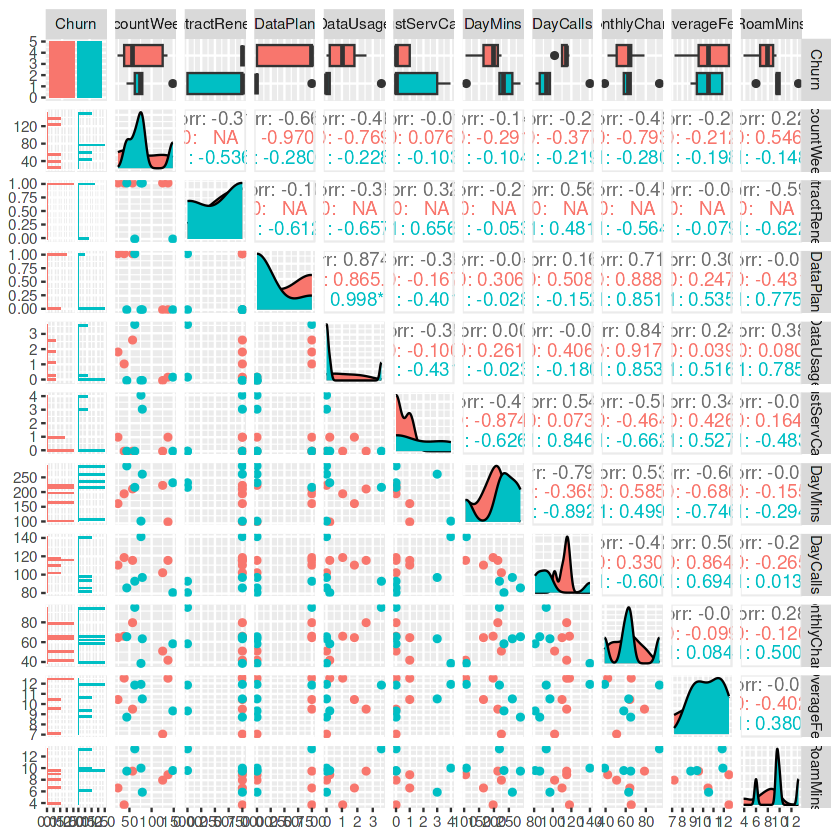

In [10]:
library(sampling)

# Ensure Churn is a factor
churn$Churn <- as.factor(churn$Churn)

id2 <- strata(churn, stratanames = "Churn",
              size = rep(5, length(unique(churn$Churn))),
              method = "srswor")
s2 <- churn %>% slice(id2$ID_unit)

ggpairs(s2, aes(color = as.factor(Churn)), progress = FALSE)


## 12.  Dimensionality Reduction - PCA 


Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


HTML widgets cannot be represented in plain text (need html)

  AccountWeeks   ContractRenewal     DataPlan        DataUsage     
 Min.   :  1.0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 74.0   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :101.0   Median :1.0000   Median :0.0000   Median :0.0000  
 Mean   :101.1   Mean   :0.9031   Mean   :0.2766   Mean   :0.8165  
 3rd Qu.:127.0   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.7800  
 Max.   :243.0   Max.   :1.0000   Max.   :1.0000   Max.   :5.4000  
 CustServCalls      DayMins         DayCalls     MonthlyCharge   
 Min.   :0.000   Min.   :  0.0   Min.   :  0.0   Min.   : 14.00  
 1st Qu.:1.000   1st Qu.:143.7   1st Qu.: 87.0   1st Qu.: 45.00  
 Median :1.000   Median :179.4   Median :101.0   Median : 53.50  
 Mean   :1.563   Mean   :179.8   Mean   :100.4   Mean   : 56.31  
 3rd Qu.:2.000   3rd Qu.:216.4   3rd Qu.:114.0   3rd Qu.: 66.20  
 Max.   :9.000   Max.   :350.8   Max.   :165.0   Max.   :111.30  
   OverageFee       RoamMins         tenure       TotalCharges

tibble [3,333 × 12] (S3: tbl_df/tbl/data.frame)
 $ AccountWeeks   : num [1:3333] 128 107 137 84 75 118 121 147 117 141 ...
 $ ContractRenewal: num [1:3333] 1 1 1 0 0 0 1 0 1 0 ...
 $ DataPlan       : num [1:3333] 1 1 0 0 0 0 1 0 0 1 ...
 $ DataUsage      : num [1:3333] 2.7 3.7 0 0 0 0 2.03 0 0.19 3.02 ...
 $ CustServCalls  : num [1:3333] 1 1 0 2 3 0 3 0 1 0 ...
 $ DayMins        : num [1:3333] 265 162 243 299 167 ...
 $ DayCalls       : num [1:3333] 110 123 114 71 113 98 88 79 97 84 ...
 $ MonthlyCharge  : num [1:3333] 89 82 52 57 41 57 87.3 36 63.9 93.2 ...
 $ OverageFee     : num [1:3333] 9.87 9.78 6.06 3.1 7.42 ...
 $ RoamMins       : num [1:3333] 10 13.7 12.2 6.6 10.1 6.3 7.5 7.1 8.7 11.2 ...
 $ tenure         : int [1:3333] 49 65 25 18 49 47 24 71 37 20 ...
 $ TotalCharges   : num [1:3333] 4361 5330 1300 1026 2009 ...


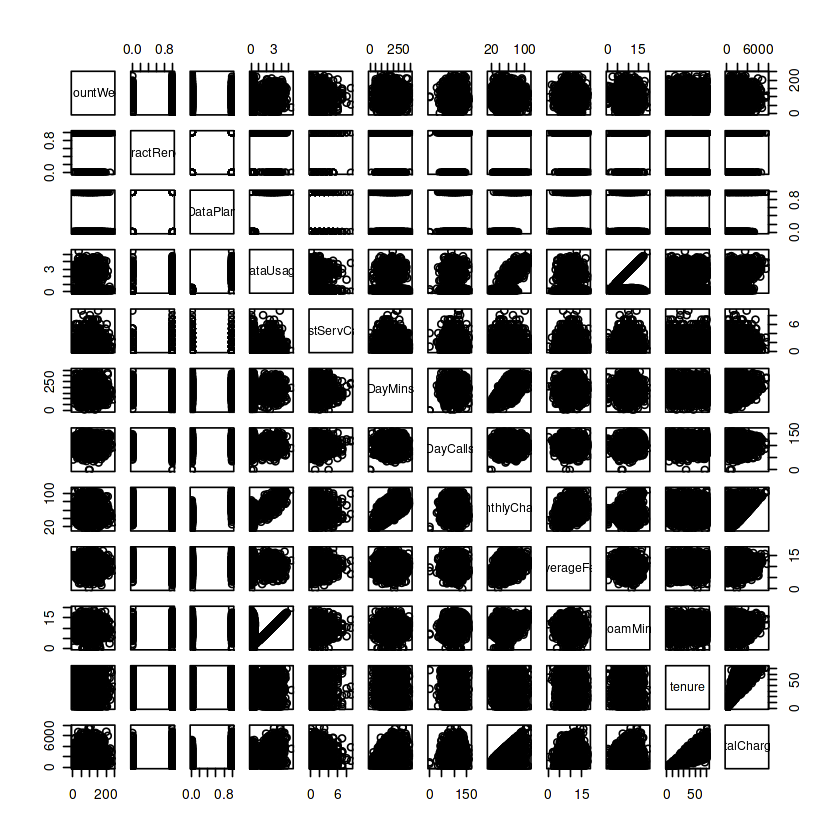

In [41]:
plotly::plot_ly(churn, x = ~tenure, y = ~MonthlyCharges, z = ~TotalCharges,
                color = ~as.factor(Churn), size = 1) %>% 
  plotly::add_markers()

pc <- churn %>%
  select_if(is.numeric) %>%
  drop_na() %>%
  prcomp(scale. = TRUE)

summary(pc)
plot(pc, type = "lines")
str(pc)


## 13. PCA-Principal Component Analysis 


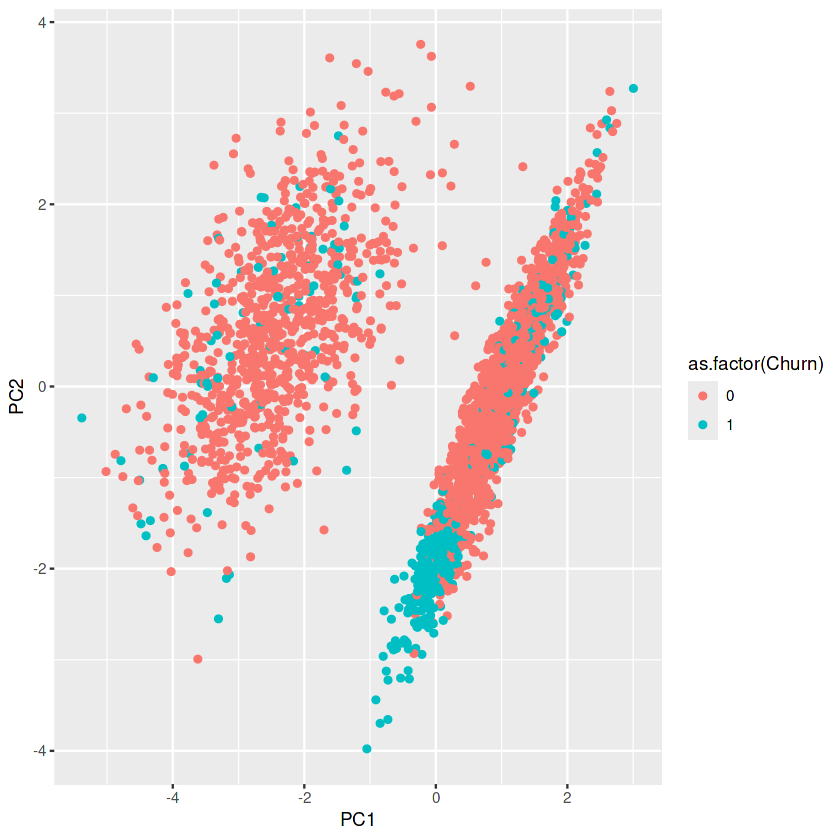

In [12]:
churn_projected <- as_tibble(pc$x) %>%
  add_column(Churn = churn$Churn[complete.cases(churn)])

ggplot(churn_projected, aes(x = PC1, y = PC2, color = as.factor(Churn))) +
  geom_point()


## 14. Visualizing PCA Components 


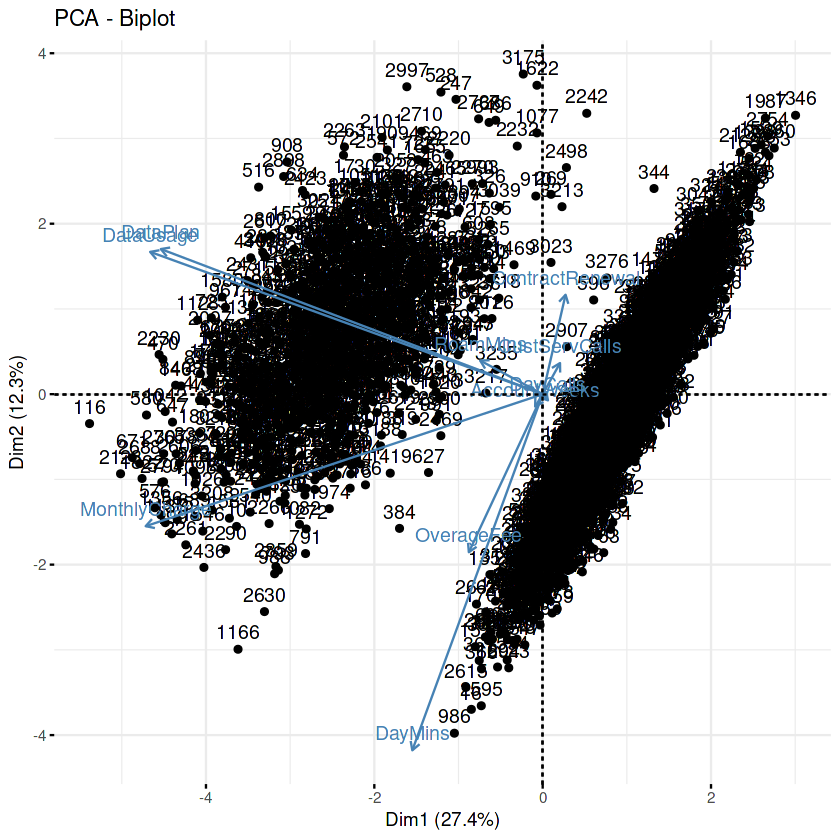

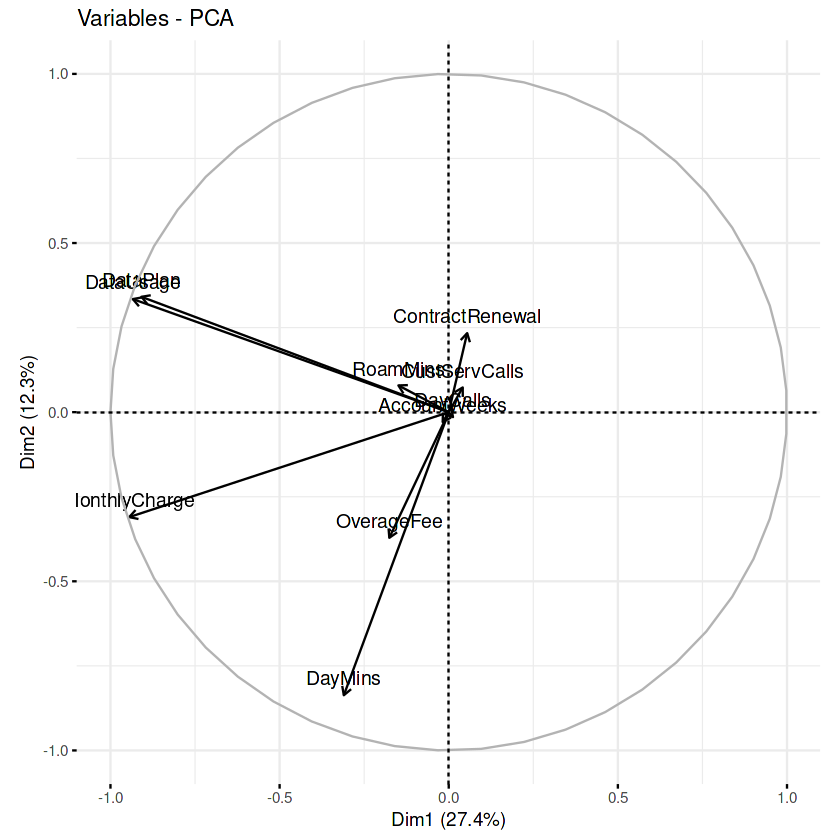

In [13]:
library(factoextra)
fviz_pca(pc)
fviz_pca_var(pc)


## 15. Data Discretization using the below code 


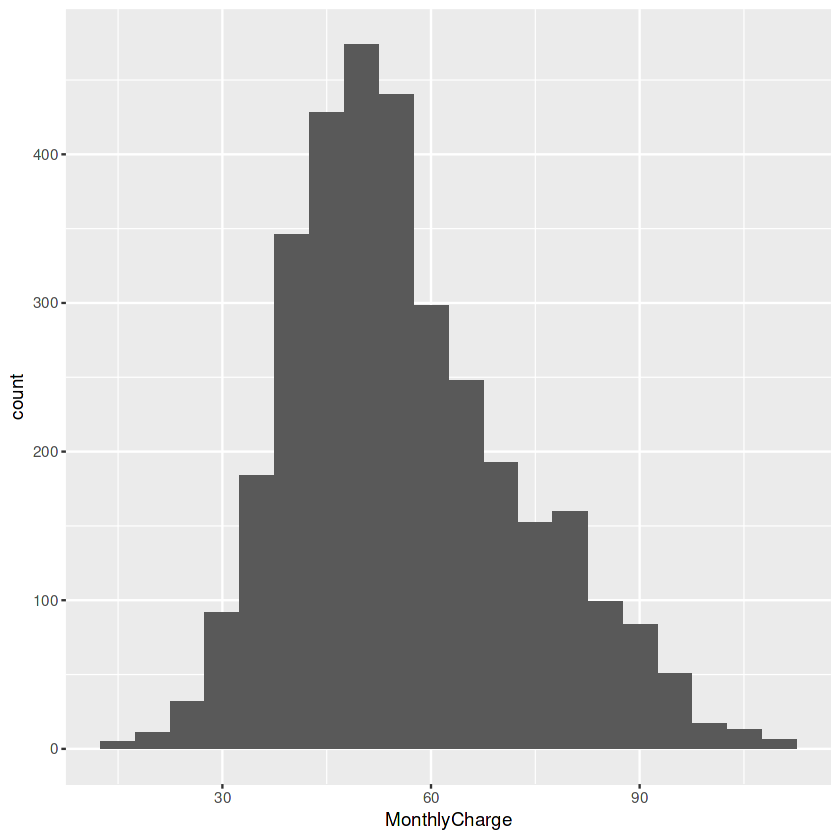

In [35]:
ggplot(churn, aes(x = MonthlyCharge)) + 
  geom_histogram(binwidth = 5)


## 16.  Proximities: Similarities and Distances. Analyze similarity using the above code and 
## elaborate the output 

In [15]:
churn_sample <- churn %>%
  select_if(is.numeric) %>%
  slice(1:5)

dist(churn_sample, method = "euclidean")
dist(churn_sample, method = "manhattan")
dist(churn_sample, method = "maximum")


          1         2         3         4
2 106.70496                              
3  44.33437  92.75785                    
4  75.66487 151.52083  88.67988          
5 121.75329  53.56519  99.32346 140.50695

       1      2      3      4
2 149.29                     
3  82.41 161.72              
4 165.17 258.28 168.56       
5 211.65 101.76 158.16 208.52

      1     2     3     4
2 103.5                  
3  37.0  81.8            
4  44.0 137.8  56.0      
5  98.4  41.0  76.7 132.7

## 17. Feature Relationships and Correlation 


In [34]:
cc <- churn %>% select_if(is.numeric) %>% cor(use = "complete.obs")
print(cc)

with(churn, cor(MonthlyCharges, TotalCharges, use = "complete.obs"))
with(churn, cor.test(MonthlyCharges, TotalCharges))

ggplot(churn, aes(MonthlyCharges, TotalCharges)) +
  geom_point() +
  geom_smooth(method = "lm")


[1] "Churn"           "AccountWeeks"    "ContractRenewal" "DataPlan"       
 [5] "DataUsage"       "CustServCalls"   "DayMins"         "DayCalls"       
 [9] "MonthlyCharge"   "OverageFee"      "RoamMins"        "HighCharge"     
[13] "TotalCharges"

                AccountWeeks ContractRenewal     DataPlan    DataUsage
AccountWeeks     1.000000000    -0.024734655  0.002918409  0.014390757
ContractRenewal -0.024734655     1.000000000 -0.006006371 -0.019222913
DataPlan         0.002918409    -0.006006371  1.000000000  0.945981734
DataUsage        0.014390757    -0.019222913  0.945981734  1.000000000
CustServCalls   -0.003795939     0.024521956 -0.017823944 -0.021722518
DayMins          0.006216021    -0.049395824 -0.001684069  0.003175951
DayCalls         0.038469882    -0.003754626 -0.011085902 -0.007962079
MonthlyCharge    0.012580670    -0.047291399  0.737489653  0.781660429
OverageFee      -0.006749462    -0.019104644  0.021525559  0.019637372
RoamMins         0.009513902    -0.045870743 -0.001317871  0.162745576
TotalCharges     0.780149755    -0.048775240  0.433641477  0.469322129
                CustServCalls      DayMins     DayCalls MonthlyCharge
AccountWeeks     -0.003795939  0.006216021  0.038469882   0.012580670
Contract

[1] "Churn"           "AccountWeeks"    "ContractRenewal" "DataPlan"       
 [5] "DataUsage"       "CustServCalls"   "DayMins"         "DayCalls"       
 [9] "MonthlyCharge"   "OverageFee"      "RoamMins"        "HighCharge"

## 18. elaborate the output using the above code. 


In [17]:
take <- sample(seq(nrow(churn)), size = 15)
churn[take, ]


Churn AccountWeeks ContractRenewal DataPlan DataUsage CustServCalls DayMins
1  0      95          1               0        0.00      2             157.3  
2  0     141          1               0        0.00      5             242.8  
3  0     116          1               1        3.13      2             268.6  
4  0      62          1               0        0.00      0             100.0  
5  0      82          1               1        1.27      3             232.6  
6  0      88          1               1        2.94      1              93.4  
7  0     113          1               0        0.00      0              81.3  
8  0      87          1               0        0.00      1             205.2  
9  0     120          1               1        2.08      0             239.4  
10 0      64          1               1        1.59      8             210.0  
11 0     105          1               0        0.30      1             146.4  
12 0     104          1               0        0.23      2             182.9  
13 0      95          1               0        0.00      2             142.5  
14 1      78          0               0        0.00      1             236.8  
15 0      84          1               1        2.03      4             207.5  
   DayCalls MonthlyCharge OverageFee RoamMins
1  116      44.0           9.88       8.4    
2   90      62.0          11.71       6.0    
3   83      92.3           8.91      11.6    
4   98      32.0           8.68      10.1    
5  121      65.7           7.66       4.7    
6  106      67.4          12.60      10.9    
7  116      33.0          11.03       8.9    
8  106      44.0           4.98      13.4    
9   94      83.8          12.97       7.7    
10 116      71.9          11.64       5.9    
11  81      48.0          11.26       8.5    
12 113      54.3          11.98       5.5    
13 109      40.0           8.81       8.2    
14 141      63.0          13.27       9.5    
15 138      73.3          10.05       7.5

## 19. Normalize the Dataset and write the code 


In [18]:
churn_norm <- churn %>%
  select_if(is.numeric) %>%
  mutate_all(~ (.-min(.)) / (max(.) - min(.)))

summary(churn_norm)


  AccountWeeks    ContractRenewal     DataPlan        DataUsage     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3017   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.4132   Median :1.0000   Median :0.0000   Median :0.0000  
 Mean   :0.4135   Mean   :0.9031   Mean   :0.2766   Mean   :0.1512  
 3rd Qu.:0.5207   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.3296  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 CustServCalls       DayMins          DayCalls      MonthlyCharge   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1111   1st Qu.:0.4096   1st Qu.:0.5273   1st Qu.:0.3186  
 Median :0.1111   Median :0.5114   Median :0.6121   Median :0.4060  
 Mean   :0.1737   Mean   :0.5125   Mean   :0.6087   Mean   :0.4348  
 3rd Qu.:0.2222   3rd Qu.:0.6169   3rd Qu.:0.6909   3rd Qu.:0.5365  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   OverageFee        RoamMins     

## 20. Create an attribute in the dataset based on the existing attributes 

In [25]:
# Assuming you have a column 'MonthlyCharges' in your churn dataset
churn <- churn %>%
  mutate(HighCharge = if_else(MonthlyCharge > 70, "High", "Low"))

# Show the first few rows to check the result
head(churn)


Churn AccountWeeks ContractRenewal DataPlan DataUsage CustServCalls DayMins
1 0     128          1               1        2.7       1             265.1  
2 0     107          1               1        3.7       1             161.6  
3 0     137          1               0        0.0       0             243.4  
4 0      84          0               0        0.0       2             299.4  
5 0      75          0               0        0.0       3             166.7  
6 0     118          0               0        0.0       0             223.4  
  DayCalls MonthlyCharge OverageFee RoamMins HighCharge
1 110      89             9.87      10.0     High      
2 123      82             9.78      13.7     High      
3 114      52             6.06      12.2     Low       
4  71      57             3.10       6.6     Low       
5 113      41             7.42      10.1     Low       
6  98      57            11.03       6.3     Low